In [8]:
!pip install pandas scikit-learn matplotlib seaborn
!pip install python-docx


SVM Model Accuracy: 0.7728551336146273


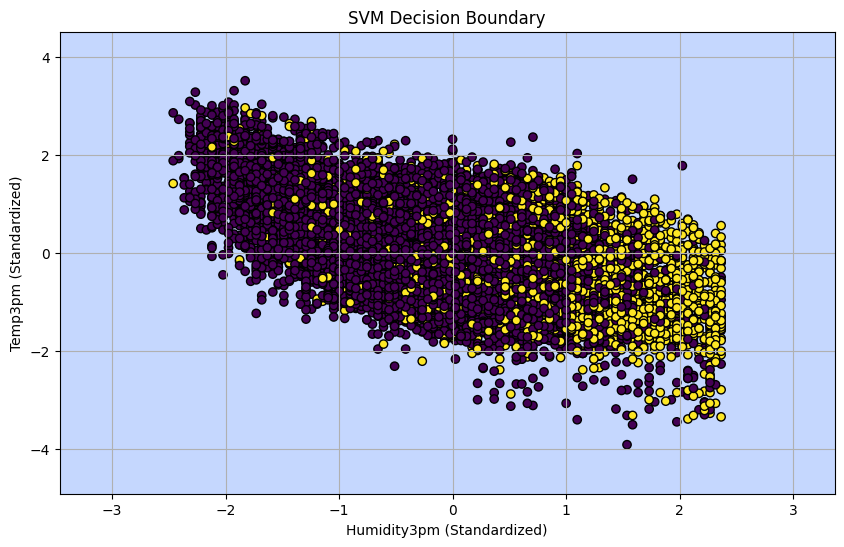

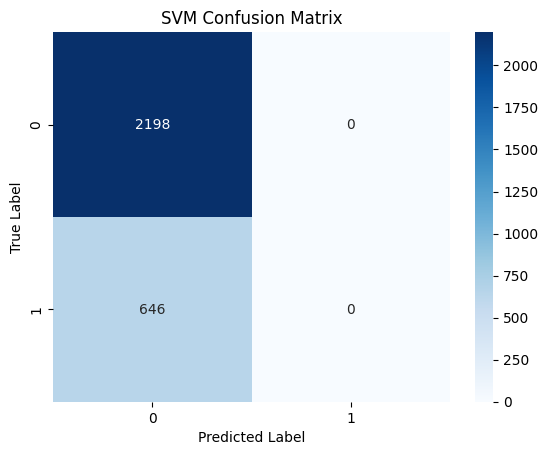

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score # Import the accuracy_score function
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
weather_data = pd.read_csv('/content/Vamshi.zip')


# Drop rows with missing target values
weather_data = weather_data.dropna(subset=['RainTomorrow'])

# Encode categorical columns
label_enc = LabelEncoder()
for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']:
    weather_data[col] = label_enc.fit_transform(weather_data[col].astype(str))

# Impute missing values for numerical columns
numerical_columns = weather_data.select_dtypes(include=['float64']).columns
weather_data[numerical_columns] = weather_data[numerical_columns].fillna(weather_data[numerical_columns].mean())

# Sample a smaller fraction of the data (e.g., 10%)
weather_data_sample = weather_data.sample(frac=0.1, random_state=42)

# Select two features for visualization
X = weather_data_sample[['Humidity3pm', 'Temp3pm']]
y = weather_data_sample['RainTomorrow']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Use a linear kernel for SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)  # Should be faster now

# Make predictions and plot confusion matrix (as before)
svm_preds = svm.predict(X_test)
# Confusion matrix code goes here...
def plot_confusion_matrix(y_true, y_pred, title):
    """Plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
# Reduced resolution for meshgrid
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))  # Reduced to 50

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Humidity3pm (Standardized)')
    plt.ylabel('Temp3pm (Standardized)')
    plt.grid()
    plt.show()

svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Model Accuracy:", svm_accuracy)
# Make predictions
svm_preds = svm.predict(X_test)

# Plot decision boundary and confusion matrix
plot_decision_boundary(svm, X_scaled, y, 'SVM Decision Boundary')
plot_confusion_matrix(y_test, svm_preds, 'SVM Confusion Matrix')



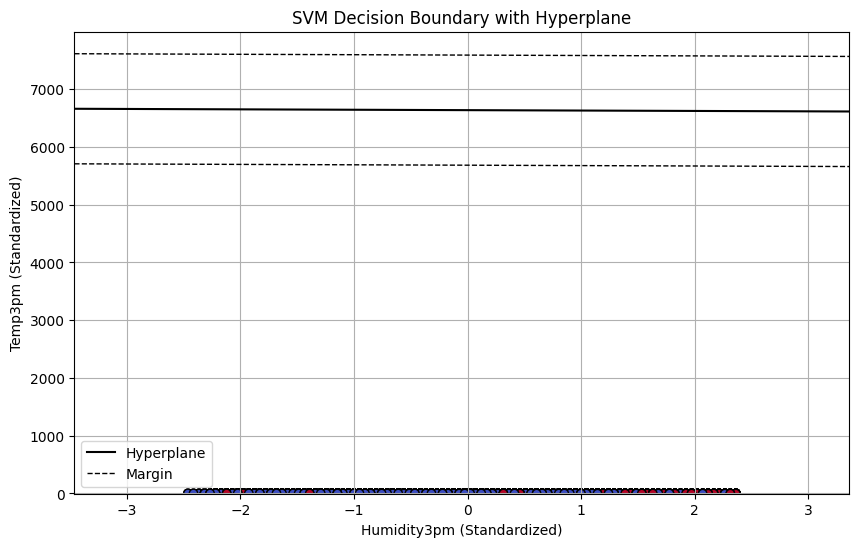

In [10]:
def plot_decision_boundary_with_hyperplane(model, X, y, title):
    plt.figure(figsize=(10, 6))

    # Define the axis limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')

    # Retrieve the coefficients (w) and intercept (b) of the hyperplane
    w = model.coef_[0]  # Coefficients
    b = model.intercept_[0]  # Intercept

    # Plot the hyperplane
    x_values = np.linspace(x_min, x_max, 100)
    y_values = -(w[0] / w[1]) * x_values - (b / w[1])
    plt.plot(x_values, y_values, color='black', linestyle='-', label='Hyperplane')

    # Plot the margins
    margin = 1 / np.sqrt(np.sum(w ** 2))
    y_margin1 = y_values + margin
    y_margin2 = y_values - margin
    plt.plot(x_values, y_margin1, 'k--', linewidth=1, label='Margin')
    plt.plot(x_values, y_margin2, 'k--', linewidth=1)

    plt.title(title)
    plt.xlabel('Humidity3pm (Standardized)')
    plt.ylabel('Temp3pm (Standardized)')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the decision boundary with hyperplane
plot_decision_boundary_with_hyperplane(svm, X_scaled, y, 'SVM Decision Boundary with Hyperplane')


NameError: name 'accuracy_svm' is not defined